Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

[![nbviewer](https://img.shields.io/badge/render-nbviewer-orange.svg)](http://nbviewer.jupyter.org/github/pnavaro/big-data/blob/master/09.PandasSeries.ipynb)



![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem` and count word occurences with a `collection.Counter`. Put the result in a `dict`.

In [41]:
import string
from lorem import text
from collections import Counter
translator = str.maketrans('', '', string.punctuation)

words = []
for line in text().split("\n"):
    for word in line.strip().split(' '):
        word = word.lower().translate(translator)
        if len(word) > 0 : words.append(word)
c = Counter(words)
data = dict(c.most_common())
data

{'adipisci': 5,
 'aliquam': 8,
 'amet': 3,
 'consectetur': 9,
 'dolor': 10,
 'dolore': 5,
 'dolorem': 15,
 'eius': 9,
 'est': 13,
 'etincidunt': 10,
 'ipsum': 7,
 'labore': 11,
 'magnam': 10,
 'modi': 6,
 'neque': 9,
 'non': 10,
 'numquam': 9,
 'porro': 14,
 'quaerat': 9,
 'quiquia': 9,
 'quisquam': 9,
 'sed': 8,
 'sit': 7,
 'tempora': 8,
 'ut': 10,
 'velit': 8,
 'voluptatem': 9}

### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [42]:
latin_series = pd.Series(data)

### Exercise

- Plot the series using 'bar' kind.

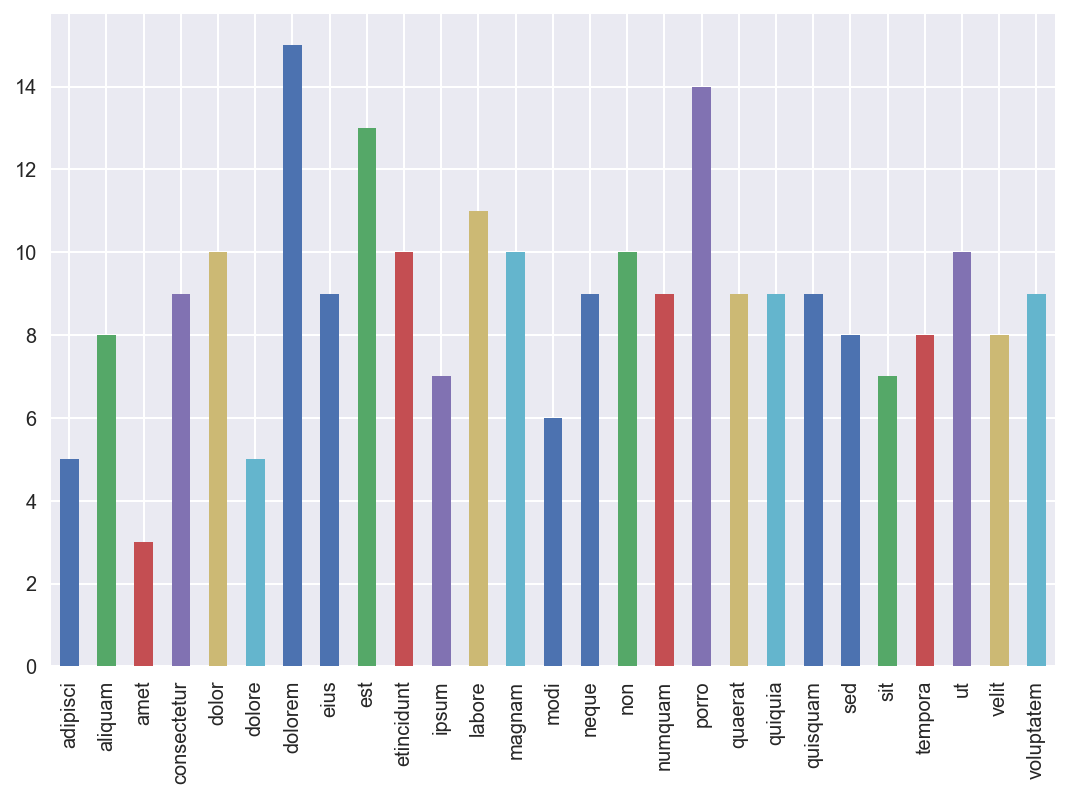

In [43]:
latin_series.plot(kind='bar');

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [44]:
latin_series.dolore
latin_series[['dolor','dolore']]

dolor     10
dolore     5
dtype: int64

In [45]:
latin_series.loc['dolore'], latin_series.iloc[-1]

(5, 9)

### Exercise
- Sort words by number of occurrences.
- Plot the Series.

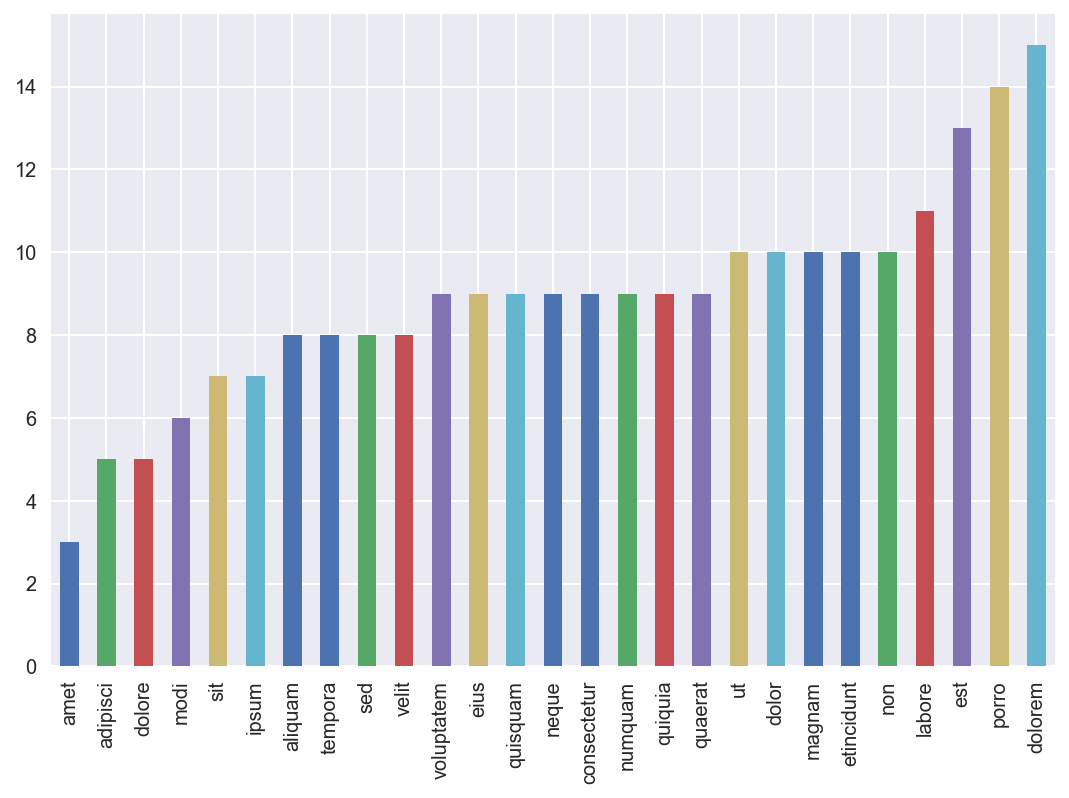

In [46]:
latin_series = latin_series.sort_values(axis=0)
latin_series.plot(kind='bar');

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [50]:
import os
here = os.getcwd()

filename = os.path.join(here,"data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                                names=["year", "month", "mean temp"])

df.insert(loc=2,column='day',value=np.repeat(1,len(df)))

### Exercise
- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.

In [51]:
df.index = pd.to_datetime(df[["year","month","day"]])
df = df["mean temp"]
print(type(df))
print(df.dtype)
print(df.shape)
print(df.nbytes)
df

<class 'pandas.core.series.Series'>
float64
(1584,)
12672


1880-01-01     -0.0235
1880-02-01     -0.4936
1880-03-01     -0.6785
1880-04-01     -0.2829
                ...   
2011-09-01   -999.0000
2011-10-01   -999.0000
2011-11-01   -999.0000
2011-12-01   -999.0000
Name: mean temp, Length: 1584, dtype: float64

### Exercise 
- Display the beginning of the file with `.head`.

In [53]:
df.head()

1880-01-01   -0.0235
1880-02-01   -0.4936
1880-03-01   -0.6785
1880-04-01   -0.2829
1880-05-01   -0.1261
Name: mean temp, dtype: float64

### Exercise 
- Display the end of the file with `.tail`.

In [54]:
df.tail()

2011-08-01   -999.0
2011-09-01   -999.0
2011-10-01   -999.0
2011-11-01   -999.0
2011-12-01   -999.0
Name: mean temp, dtype: float64

In the dataset, -999.00 was used to indicate that there was no value for that year.

### Exercise

- Display values equal to -999 with `.values`. 
- Replace the missing value (-999.000) by `np.nan` 


In [31]:
df[df.values == -999.00]

Series([], Freq: M, Name: mean temp, dtype: float64)

In [60]:
df[df == -999.000] = np.nan
df.tail()

2011-08-01   NaN
2011-09-01   NaN
2011-10-01   NaN
2011-11-01   NaN
2011-12-01   NaN
Name: mean temp, dtype: float64


Once they have been converted to np.nan, missing values can be removed (dropped).

### Exercise 
- Remove missing values with `.dropna`.

In [61]:
df.dropna().tail() # NaN value is removed

2011-02-01    0.5113
2011-03-01    0.8618
2011-04-01    1.0897
2011-05-01    0.7247
2011-06-01    0.8550
Name: mean temp, dtype: float64

In [62]:
df = df.dropna()
df.tail()

2011-02-01    0.5113
2011-03-01    0.8618
2011-04-01    1.0897
2011-05-01    0.7247
2011-06-01    0.8550
Name: mean temp, dtype: float64

### Exercise
- Generate a basic visualization using `.plot`.

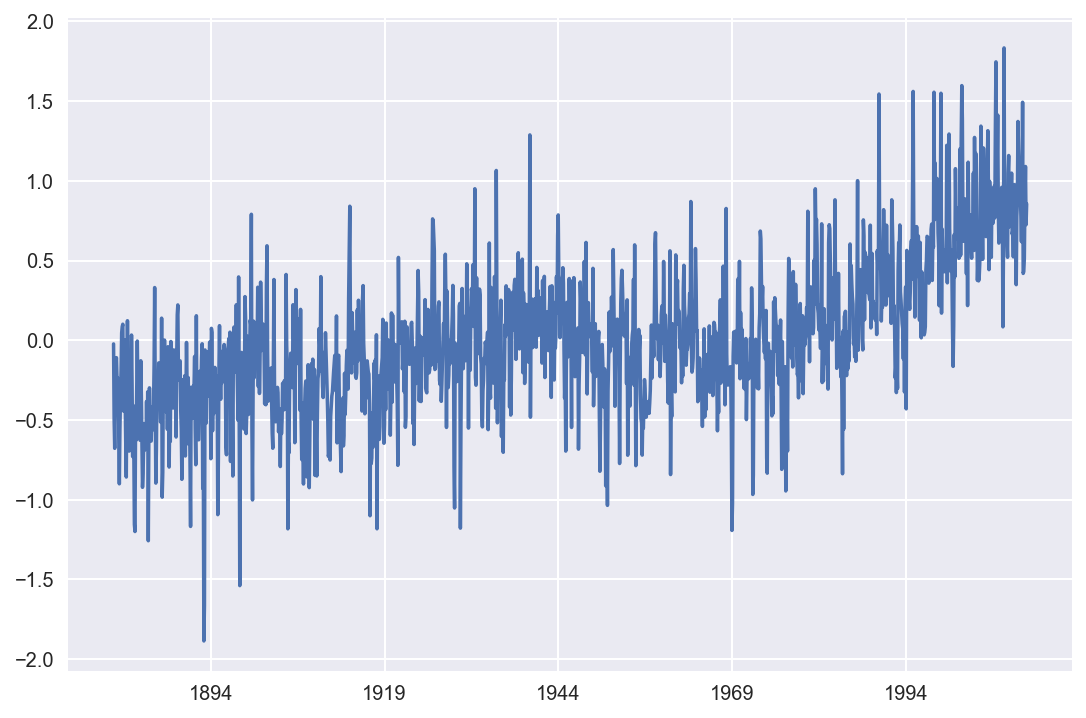

In [63]:
df.plot()

### Exercise

Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.


In [64]:
df.index = df.index.to_period()
df

1880-01   -0.0235
1880-02   -0.4936
1880-03   -0.6785
1880-04   -0.2829
            ...  
2011-03    0.8618
2011-04    1.0897
2011-05    0.7247
2011-06    0.8550
Freq: M, Name: mean temp, Length: 1578, dtype: float64

In [65]:
df.index.dtype

period[M]

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Exercise

- With `resample` method, convert df Series to 10 year blocks:

In [66]:
df.resample("10A").mean()

1880   -0.386485
1890   -0.316798
1900   -0.256431
1910   -0.247673
          ...   
1980    0.188519
1990    0.463572
2000    0.785452
2010    0.884700
Freq: 10A-DEC, Name: mean temp, Length: 14, dtype: float64

- Try to upscale to a daily series

In [67]:
df.resample("D").mean()

1880-01-01   -0.0235
1880-01-02       NaN
1880-01-03       NaN
1880-01-04       NaN
               ...  
2011-06-27       NaN
2011-06-28       NaN
2011-06-29       NaN
2011-06-30       NaN
Freq: D, Name: mean temp, Length: 48028, dtype: float64

In [68]:
import toyplot # https://toyplot.readthedocs.io/
canvas = toyplot.Canvas(width=640, height=480)
rolled_series = df.rolling(window=10, center=True)
axes = canvas.cartesian(xlabel="Year", ylabel=u"Temperature \u00b0F")
axes.plot(df.values, color="red", stroke_width=1)
axes.plot(rolled_series.mean(), color="blue", stroke_width=2)

<path d="M 50.0 242.23250000000004 L 50.342422320862397 286.89199999999994 L 50.684844641724794 304.45750000000004 L 51.027266962587184 266.87549999999993 L 51.369689283449588 251.97950000000003 L 51.712111604311986 250.41199999999998 L 52.054533925174383 264.07299999999998 L 52.39695624603678 262.34399999999999 L 52.739378566899177 269.31700000000001 L 53.081800887761574 298.65300000000002 L 53.424223208623971 325.60449999999997 L 53.766645529486368 292.41149999999999 L 54.109067850348765 273.19300000000004 L 54.451490171211162 258.10699999999997 L 54.793912492073552 235.70600000000002 L 55.136334812935957 231.90600000000001 L 55.478757133798354 230.46199999999999 L 55.821179454660751 282.18950000000001 L 56.163601775523141 257.06200000000001 L 56.506024096385538 239.77199999999999 L 56.848446417247942 273.041 L 57.190868738110339 299.88799999999998 L 57.533291058972736 321.55750000000006 L 57.875713379835126 259.81700000000001 L 58.21813570069753 228.40049999999999 L 58.560558021559928 256.44449999999995 L 58.902980342422325 261.774 L 59.245402663284715 306.0915 L 59.587824984147112 285.85649999999998 L 59.930247305009516 280.66949999999997 L 60.272669625871906 281.43900000000002 L 60.61509194673431 236.93149999999997 L 60.9575142675967 266.82799999999997 L 61.299936588459104 309.38799999999998 L 61.642358909321494 278.95949999999993 L 61.984781230183891 305.45499999999998 L 62.327203551046296 349.87700000000001 L 62.669625871908693 354.03800000000001 L 63.012048192771083 289.875 L 63.35447051363348 299.54600000000005 L 63.696892834495884 269.53550000000001 L 64.039315155358281 240.5035 L 64.381737476220678 271.21699999999998 L 64.724159797083075 274.80799999999999 L 65.066582117945472 273.21200000000005 L 65.40900443880787 291.12899999999996 L 65.751426759670252 299.68849999999998 L 66.093849080532664 252.274 L 66.436271401395061 272.98399999999998 L 66.778693722257458 299.76450000000006 L 67.121116043119841 327.69450000000001 L 67.463538363982238 319.40100000000001 L 67.805960684844649 301.72149999999999 L 68.148383005707046 289.91300000000001 L 68.490805326569429 305.45499999999998 L 68.833227647431826 293.90300000000002 L 69.175649968294238 303.87800000000004 L 69.518072289156635 276.50850000000003 L 69.860494610019032 303.75450000000001 L 70.202916930881415 270.76099999999997 L 70.545339251743812 359.53850000000006 L 70.887761572606223 295.4325 L 71.230183893468606 268.41450000000003 L 71.572606214331017 286.86350000000004 L 71.9150285351934 298.37750000000005 L 72.257450856055812 300.14449999999999 L 72.599873176918194 285.25799999999998 L 72.942295497780592 293.61799999999999 L 73.284717818643003 279.49149999999997 L 73.6271401395054 280.47949999999997 L 73.969562460367783 255.16200000000001 L 74.31198478123018 208.631 L 74.654407102092591 274.93150000000003 L 74.996829422954988 325.17700000000002 L 75.339251743817371 304.86599999999999 L 75.681674064679768 263.42700000000002 L 76.024096385542165 265.90649999999999 L 76.366518706404577 277.67700000000002 L 76.70894102726696 253.53749999999999 L 77.051363348129371 257.64149999999995 L 77.393785668991754 270.32400000000001 L 77.736207989854151 288.63049999999998 L 78.078630310716548 288.97249999999997 L 78.421052631578945 226.87100000000001 L 78.763474952441342 333.56550000000004 L 79.105897273303739 318.61250000000001 L 79.448319594166136 259.01900000000001 L 79.790741915028534 271.52100000000002 L 80.133164235890945 239.92400000000001 L 80.475586556753328 266.56200000000007 L 80.818008877615725 261.69799999999998 L 81.160431198478122 282.76899999999995 L 81.502853519340519 250.43099999999998 L 81.845275840202916 293.11450000000002 L 82.187698161065299 243.89500000000001 L 82.53012048192771 248.49299999999999 L 82.872542802790107 315.601 L 83.214965123652505 287.35750000000002 L 83.557387444514902 300.32499999999999 L 83.899809765377299 240.78850000000003 L 84.242232086239696 276.12849999999997 L 84.584654407102093 272.73699999999997 L 84.927076727964476 245.8329999999

# Saving Work

Excel Writer does not work with Series.

In [69]:
with pd.ExcelWriter("data/test.xls") as writer:
    pd.DataFrame({"Full Globe Temperature": df}).to_excel(writer, sheet_name="Full Globe Temperature")

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [70]:
with pd.HDFStore("data/pandas_series.h5") as writer:
    df.to_hdf(writer, "/temperatures/full_globe")

# Reloading data

In [71]:
with pd.HDFStore("data/pandas_series.h5") as store:
    df = store["/temperatures/full_globe"]